In [89]:
import numpy as np
import matplotlib.pyplot as plt

In [90]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['text.usetex'] = True

SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

LINEWIDTH = 3
MEW = 2

In [91]:
data_dir = "./synthetic_data/"
results_dir = data_dir+"f_results/"

n_class = 3
num_T = 5
num_trials = 5
noise_rates = [0.6, 0.4, 0.3, 0.2, 0.1]

training_sizes = [100, 1000, 10000, 100000]

In [92]:
def get_mean_std(scores):
    mean = np.mean(scores, axis=1)
    std = np.std(scores, axis=1, ddof=1)
    return mean, std

# Micro F1

In [93]:
train_scores = np.zeros((num_T+1, len(training_sizes), num_trials))
test_scores = np.zeros((num_T+1, len(training_sizes), num_trials))

for i in range(len(training_sizes)):
    for j in range(num_T):
        for k in range(num_trials):
            results = np.load(results_dir+"results_"+str(training_sizes[i])+"_"+str(j)+"_"+str(k)+".npy", allow_pickle=True)
            train_scores[j, i, k] = results[0]
            test_scores[j, i, k] = results[1]
    
    for k in range(num_trials):
        results = np.load(results_dir+"results_clean_"+str(training_sizes[i])+"_"+str(k)+".npy", allow_pickle=True)
        train_scores[-1, i, k] = results[0]
        test_scores[-1, i, k] = results[1]

bayes = np.load(results_dir+"results_bayes.npy", allow_pickle=True)

In [94]:
print("bayes: ", bayes)
print("train scores: ", train_scores[-1])
print("test scores: ", test_scores[-1])

bayes:  [0.78019218 0.78019218]
train scores:  [[0.79310347 0.84615396 0.75675679 0.7777778  0.80000002]
 [0.8033899  0.83802818 0.82843715 0.72703419 0.8172414 ]
 [0.78805974 0.77856584 0.78058257 0.77994433 0.78911075]
 [0.77864413 0.78159355 0.77935019 0.78358741 0.77839531]]
test scores:  [[0.8266205  0.9781471  0.79522649 0.8266205  0.85021047]
 [0.81809335 0.82661295 0.80069192 0.80237179 0.8265881 ]
 [0.78187496 0.78220113 0.78482442 0.78172838 0.78068305]
 [0.78087725 0.78018669 0.78098973 0.78117493 0.78044391]]


[0.84305183 0.82482466 0.79037875 0.78432816] [0.01909802 0.00962361 0.00177149 0.00112939]
[0.81982175 0.84634473 0.79443837 0.78926152] [0.01007909 0.01385144 0.00262939 0.00015316]
[0.85111145 0.80599368 0.79315296 0.78925476] [0.01255645 0.01063545 0.00252704 0.00038986]
[0.87853881 0.84907389 0.80441147 0.789537  ] [0.02120023 0.02107939 0.00182592 0.00039075]
[0.88191383 0.88455331 0.85705041 0.8006275 ] [0.01618869 0.01833138 0.01344261 0.00878035]


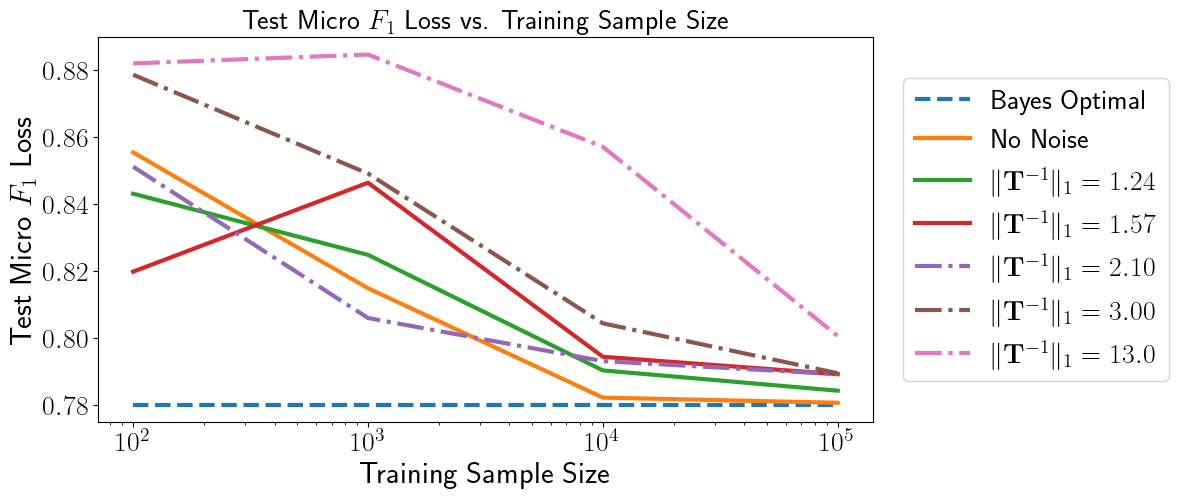

In [95]:
plt.figure(figsize=(10, 5))

# Bayes optimal
plt.plot(training_sizes, bayes[1]*np.ones(len(training_sizes)), linestyle="dashed", linewidth=LINEWIDTH, mew=MEW)

# No noise
mean, std = get_mean_std(test_scores[-1])
std_err = std/np.sqrt(num_trials)
plt.plot(training_sizes, mean, linestyle="solid", linewidth=LINEWIDTH, mew=MEW)

for j in reversed(range(num_T)):
    mean, std = get_mean_std(test_scores[j])
    std_err = std/np.sqrt(num_trials)
    print(mean, std_err)
    #plt.errorbar(training_sizes, mean, std_err)
    if j < 3:
        plt.plot(training_sizes, mean, linestyle="dashdot", linewidth=LINEWIDTH, mew=MEW)
    else:
        plt.plot(training_sizes, mean, linestyle="solid", linewidth=LINEWIDTH, mew=MEW)

plt.xscale("log")
plt.xlabel("Training Sample Size")
plt.ylabel(r"Test Micro $F_1$ Loss")
plt.legend([r"Bayes Optimal", r"No Noise", r'$\Vert \mathbf{T}^{-1} \Vert_1 = 1.24$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 1.57$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 2.10$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 3.00$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 13.0$'], loc='right', bbox_to_anchor=(1.4, 0.5))
plt.title(r"Test Micro $F_1$ Loss vs. Training Sample Size")

#plt.show()
plt.savefig(results_dir+"test_Fmeasure_loss.pdf", bbox_inches='tight')

# Q-mean

In [96]:
results_dir = data_dir+"q_results/"

In [97]:
train_scores = np.zeros((num_T+1, len(training_sizes), num_trials))
test_scores = np.zeros((num_T+1, len(training_sizes), num_trials))

for i in range(len(training_sizes)):
    for j in range(num_T):
        for k in range(num_trials):
            results = np.load(results_dir+"results_"+str(training_sizes[i])+"_"+str(j)+"_"+str(k)+".npy", allow_pickle=True)
            train_scores[j, i, k] = results[0]
            test_scores[j, i, k] = results[1]
    
    for k in range(num_trials):
        results = np.load(results_dir+"results_clean_"+str(training_sizes[i])+"_"+str(k)+".npy", allow_pickle=True)
        train_scores[-1, i, k] = results[0]
        test_scores[-1, i, k] = results[1]

bayes = np.load(results_dir+"results_bayes.npy", allow_pickle=True)

In [98]:
print("bayes: ", bayes)
print("train scores: ", train_scores[-1])
print("test scores: ", test_scores[-1])

bayes:  [0.52223812 0.52223812]
train scores:  [[0.48849781 0.51487116 0.55105792 0.67405631 0.47844682]
 [0.49499794 0.62849641 0.54157443 0.52116351 0.66176985]
 [0.53438329 0.51509961 0.53940981 0.54090158 0.52702633]
 [0.52567337 0.517043   0.5199631  0.52038403 0.51789205]]
test scores:  [[0.57714811 0.61884344 0.53062089 0.67213643 0.56899019]
 [0.54703818 0.62697138 0.53909728 0.55350219 0.67021176]
 [0.52325532 0.52316741 0.52375439 0.52394648 0.52374815]
 [0.52356514 0.52335072 0.52296449 0.5238542  0.52230002]]


[0.65010847 0.54628056 0.5281907  0.52320043] [0.03414995 0.00495648 0.00246174 0.00024226]
[0.68971021 0.6187448  0.56322677 0.52879353] [0.03969117 0.0221838  0.00746727 0.00119651]
[0.71989271 0.59884546 0.58988197 0.53681333] [0.02983113 0.02858906 0.0129694  0.00299749]
[0.70966338 0.65192538 0.59909804 0.5606169 ] [0.03368315 0.0316783  0.01076404 0.00661764]
[0.72057929 0.71322268 0.66096389 0.65061714] [0.01539393 0.02001289 0.02936263 0.02885294]


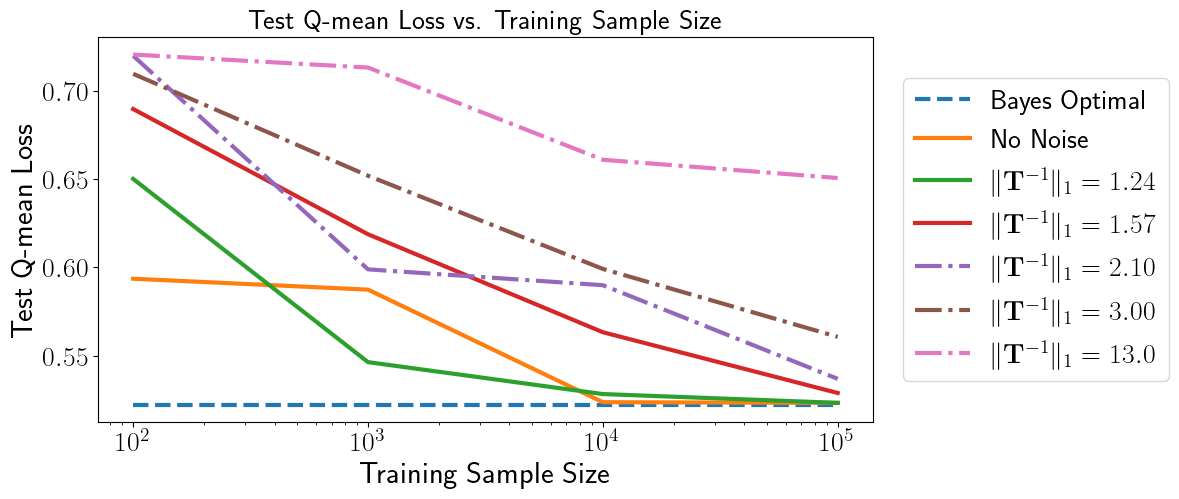

In [103]:
plt.figure(figsize=(10, 5))

# Bayes optimal
plt.plot(training_sizes, bayes[1]*np.ones(len(training_sizes)), linestyle="dashed", linewidth=LINEWIDTH, mew=MEW)

# No noise
mean, std = get_mean_std(test_scores[-1])
std_err = std/np.sqrt(num_trials)
plt.plot(training_sizes, mean, linestyle="solid", linewidth=LINEWIDTH, mew=MEW)

for j in reversed(range(num_T)):
    mean, std = get_mean_std(test_scores[j])
    std_err = std/np.sqrt(num_trials)
    print(mean, std_err)
    #plt.errorbar(training_sizes, mean, std_err)
    if j < 3:
        plt.plot(training_sizes, mean, linestyle="dashdot", linewidth=LINEWIDTH, mew=MEW)
    else:
        plt.plot(training_sizes, mean, linestyle="solid", linewidth=LINEWIDTH, mew=MEW)

plt.xscale("log")
plt.xlabel("Training Sample Size")
plt.ylabel(r"Test Q-mean Loss")
plt.legend([r"Bayes Optimal", r"No Noise", r'$\Vert \mathbf{T}^{-1} \Vert_1 = 1.24$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 1.57$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 2.10$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 3.00$', r'$\Vert \mathbf{T}^{-1} \Vert_1 = 13.0$'], loc='right', bbox_to_anchor=(1.4, 0.5))
plt.title(r"Test Q-mean Loss vs. Training Sample Size")

#plt.show()
plt.savefig(results_dir+"test_Qmean_loss.pdf", bbox_inches='tight')

In [100]:
# Check 1-norm of the noise matrices

k = 3
num_C = 5

Cs = np.zeros((num_C, k, k))
for i in range(num_C):
    Cs[i] = np.load(data_dir+"C_"+str(i)+".npy")
    print("C: ", Cs[i])
    print("1-norm of C inverse: ", np.linalg.norm(np.linalg.inv(Cs[i]), ord=1))

C:  [[0.4 0.3 0.3]
 [0.3 0.4 0.3]
 [0.3 0.3 0.4]]
1-norm of C inverse:  13.0
C:  [[0.6 0.2 0.2]
 [0.2 0.6 0.2]
 [0.2 0.2 0.6]]
1-norm of C inverse:  3.0000000000000004
C:  [[0.7  0.15 0.15]
 [0.15 0.7  0.15]
 [0.15 0.15 0.7 ]]
1-norm of C inverse:  2.0909090909090913
C:  [[0.8 0.1 0.1]
 [0.1 0.8 0.1]
 [0.1 0.1 0.8]]
1-norm of C inverse:  1.5714285714285712
C:  [[0.9  0.05 0.05]
 [0.05 0.9  0.05]
 [0.05 0.05 0.9 ]]
1-norm of C inverse:  1.2352941176470589
